In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gold_price = pd.read_csv("gld_price_data.csv")

In [3]:
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/08,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/08,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/08,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/08,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/08,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_price = gold_price.drop(["Date"], axis=1)

In [5]:
gold_price.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [7]:
gold_price.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


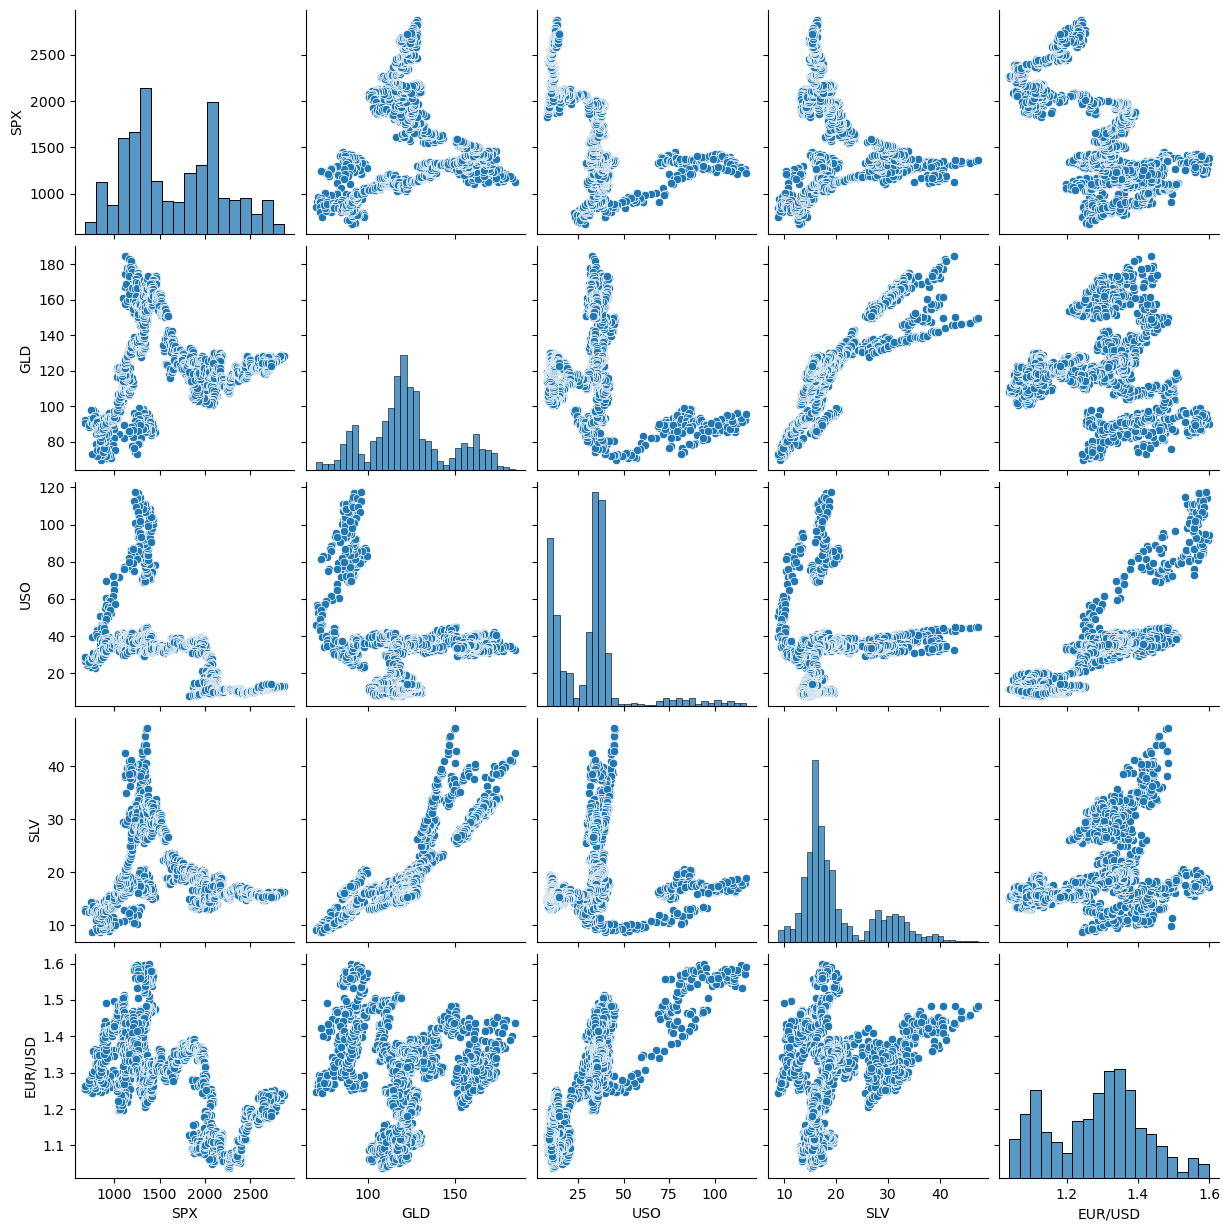

In [9]:
sns.pairplot(gold_price)

In [10]:
correlation = gold_price.corr()

<Axes: >

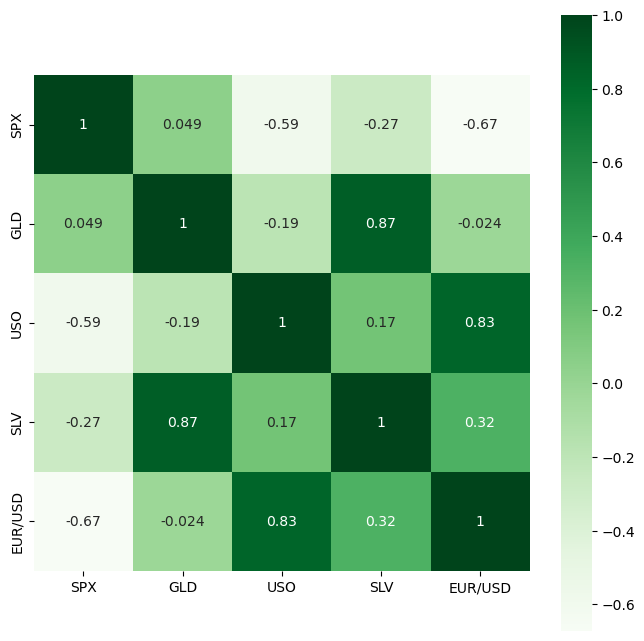

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, square = True, annot = True, cmap="Greens")

In [13]:
correlation['GLD'].sort_values(ascending=False)

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

In [14]:
x_values = gold_price.drop(['GLD'],axis=1)
y_values = gold_price['GLD']

print(x_values,y_values)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x_values, y_values, test_size=0.2)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1832, 4)
(1832,)
(458, 4)
(458,)


### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
Linear_reg = LinearRegression()
Linear_reg.fit(x_train,y_train)
print('linear reg train score : ',Linear_reg.score(x_train,y_train))
print('linear reg test score : ',Linear_reg.score(x_test,y_test))

linear reg train score :  0.8776921079293855
linear reg test score :  0.8943436950647831


In [18]:
Linear_reg_y_pred = Linear_reg.predict(x_test)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [20]:
Linear_reg_r2_score = r2_score(y_test, Linear_reg_y_pred)
print("linear regression r2 score: ",Linear_reg_r2_score)

linear regression r2 score:  0.8943436950647831


In [22]:
MAPE = mean_absolute_percentage_error(y_test, Linear_reg_y_pred)
Accuracy_linear_reg = 1-MAPE
print("Accuracy linear regression : ",Accuracy_linear_reg)

Accuracy linear regression :  0.9515294555852878


### Regressor

In [23]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor


In [25]:
Extra_reg = ExtraTreesRegressor(n_estimators=100, random_state=100)
Random_reg = RandomForestRegressor(n_estimators=100, random_state=100)
Extra_reg.fit(x_train,y_train)
Random_reg.fit(x_train,y_train)
print('EXtra reg train score : ',Extra_reg.score(x_train,y_train))
print('Extra reg test score : ',Extra_reg.score(x_test,y_test))

print('Random reg train score : ',Random_reg.score(x_train,y_train))
print('Random reg test score : ',Random_reg.score(x_test,y_test))

EXtra reg train score :  1.0
Extra reg test score :  0.991994833677399
Random reg train score :  0.9984119148521647
Random reg test score :  0.9868697724093225


In [26]:
Extra_reg_y_pred = Extra_reg.predict(x_test)
Random_reg_y_pred = Random_reg.predict(x_test)

In [27]:
Extra_reg_r2_score = r2_score(y_test, Extra_reg_y_pred)
print("Extra regression r2 score: ",Extra_reg_r2_score)

Random_reg_r2_score = r2_score(y_test, Random_reg_y_pred)
print("Random regression r2 score: ",Random_reg_r2_score)

Extra regression r2 score:  0.991994833677399
Random regression r2 score:  0.9868697724093225


In [29]:
MAPE = mean_absolute_percentage_error(y_test, Extra_reg_y_pred)
Accuracy_Extra_reg = 1-MAPE
print("Accuracy Extra regression : ",Accuracy_Extra_reg)

MAPE = mean_absolute_percentage_error(y_test, Random_reg_y_pred)
Accuracy_Random_reg = 1-MAPE
print("Accuracy Random regression : ",Accuracy_Random_reg)

Accuracy Extra regression :  0.9912973393502944
Accuracy Random regression :  0.9889253896303188


SVR

In [30]:
from sklearn.svm import SVR

In [31]:
svm = SVR(kernel='linear')
svm.fit(x_train,y_train)

print('svm reg train score : ',svm.score(x_train,y_train))
print('svm reg test score : ',svm.score(x_test,y_test))

svm reg train score :  0.8433647468295609
svm reg test score :  0.8729735661234364


In [32]:
svm_y_pred = svm.predict(x_test)
svm_r2_score = r2_score(y_test, svm_y_pred)
print("svm regression r2 score: ",svm_r2_score)
MAPE = mean_absolute_percentage_error(y_test, svm_y_pred)
Accuracy_svm_reg = 1-MAPE
print("Accuracy SVM regression : ",Accuracy_svm_reg)

svm regression r2 score:  0.8729735661234364
Accuracy SVM regression :  0.9586738647085423


In [35]:
prediced_df =  pd.DataFrame({
    "Linear_reg_y_pred":Linear_reg_y_pred,
    "Extra_reg_y_pred":Extra_reg_y_pred,
    "Random_reg_y_pred":Random_reg_y_pred,
    "svm_y_pred":svm_y_pred,
    "y_test":y_test
})

In [36]:
prediced_df.head()

,Linear_reg_y_pred,Extra_reg_y_pred,Random_reg_y_pred,svm_y_pred,y_test
1131,145.186601,153.357800,152.584799,150.939328,152.970001
1681,114.497890,108.528700,109.428600,112.290546,108.550003
1844,120.740135,122.231700,122.123200,119.935663,122.070000
506,109.320326,112.060399,112.337300,109.412607,111.839996
1029,158.048587,167.332595,165.451197,165.439224,167.919998


In [37]:
best_model = []
for ind in prediced_df.index:
    pred_values = np.array(prediced_df[prediced_df.index==ind].values[0])
    pred_values = np.abs(pred_values[:-1] - pred_values[-1])
    best_model.append(prediced_df.columns[np.argmin(pred_values)])

prediced_df['best_model'] = best_model

In [38]:
prediced_df.head()

,Linear_reg_y_pred,Extra_reg_y_pred,Random_reg_y_pred,svm_y_pred,y_test,best_model
1131,145.186601,153.357800,152.584799,150.939328,152.970001,Random_reg_y_pred
1681,114.497890,108.528700,109.428600,112.290546,108.550003,Extra_reg_y_pred
1844,120.740135,122.231700,122.123200,119.935663,122.070000,Random_reg_y_pred
506,109.320326,112.060399,112.337300,109.412607,111.839996,Extra_reg_y_pred
1029,158.048587,167.332595,165.451197,165.439224,167.919998,Extra_reg_y_pred


In [39]:
prediced_df.best_model.value_counts()

best_model
Extra_reg_y_pred     234
Random_reg_y_pred    158
svm_y_pred            41
Linear_reg_y_pred     25
Name: count, dtype: int64

### ANN

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
history = model.fit(x_train, y_train, epochs=1000, validation_split = 0.2)

Epoch 1/1000

46/46 [==============================] - 3s 15ms/step - loss: 957526.2500 - val_loss: 736180.5625
Epoch 2/1000
46/46 [==============================] - 0s 8ms/step - loss: 563540.5625 - val_loss: 455550.9688
Epoch 3/1000
46/46 [==============================] - 0s 7ms/step - loss: 364015.4375 - val_loss: 306935.8125
Epoch 4/1000
46/46 [==============================] - 0s 8ms/step - loss: 252927.4688 - val_loss: 219539.6406
Epoch 5/1000
46/46 [==============================] - 0s 8ms/step - loss: 185448.1406 - val_loss: 164059.0156
Epoch 6/1000
46/46 [==============================] - 0s 9ms/step - loss: 141452.7188 - val_loss: 127310.7812
Epoch 7/1000
46/46 [==============================] - 0s 9ms/step - loss: 111436.3984 - val_loss: 101406.3125
Epoch 8/1000
46/46 [==============================] - 0s 11ms/step - loss: 90022.4609 - val_loss: 82380.3828
Epoch 9/1000
46/46 [==============================] - 0s 9ms/step - loss: 74073.7891 - val_loss: 68301.0547
Epoch 10/10

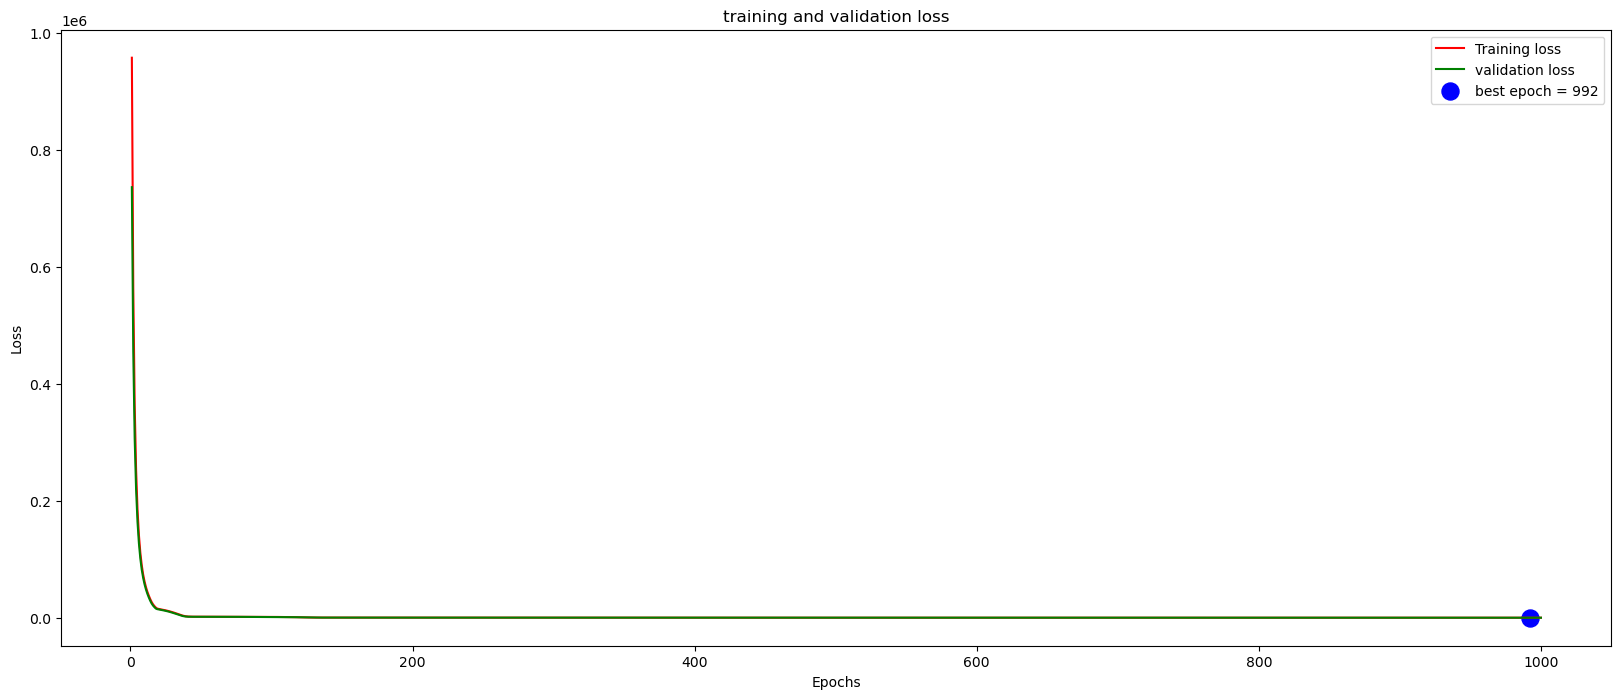

In [52]:
model_loss = history.history['loss']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(model_loss))]
loss_label = f'best epoch = {str(index_loss +1)}'

plt.figure(figsize=(20,8))

plt.plot(Epochs, model_loss, 'r', label = 'Training loss')
plt.plot(Epochs, val_loss, 'g', label = 'validation loss')
plt.scatter(index_loss+1,val_lowest,s=150, c='blue', label=loss_label)
plt.title("training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [53]:
ann_y_pred = model.predict(x_test)

15/15 [==============================] - 0s 3ms/step


In [54]:
ann_r2_score = r2_score(y_test, ann_y_pred)
print("ann_r2_score : ",ann_r2_score)

ann_r2_score :  0.9381642860609292


In [55]:
MAPE = mean_absolute_percentage_error(y_test, ann_y_pred)
Accuracy_ann_reg = 1-MAPE
print("Accuracy ANN regression : ",Accuracy_ann_reg)

Accuracy ANN regression :  0.9667565811601639
